In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
file_path="HRDataset_v14.csv"
df = pd.read_csv(file_path, encoding='latin1') 

In [3]:
pd.set_option('display.max_columns', None)  #  Show all columns

print(" File loaded successfully!")
print("Shape (rows, columns):", df.shape)
df.head()

 File loaded successfully!
Shape (rows, columns): (311, 36)


,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07-10-1983,M,Single,US Citizen,No,White,07-05-2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05-05-1975,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,07-05-2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,01-07-2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09-08-1989,F,Divorced,US Citizen,No,White,07-11-2011,09-06-2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [4]:
print("\n Column names:")
print(df.columns.tolist())


 Column names:
['ï»¿Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']


In [5]:
# Fix encoding issue for first column
df.columns = df.columns.str.replace('ï»¿', '')

In [6]:
# Clean column names: remove spaces, slashes, make lowercase
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_').str.lower()

In [7]:
# Show cleaned column names
print(" Cleaned column names:")
print(df.columns.tolist())

 Cleaned column names:
['employee_name', 'empid', 'marriedid', 'maritalstatusid', 'genderid', 'empstatusid', 'deptid', 'perfscoreid', 'fromdiversityjobfairid', 'salary', 'termd', 'positionid', 'position', 'state', 'zip', 'dob', 'sex', 'maritaldesc', 'citizendesc', 'hispaniclatino', 'racedesc', 'dateofhire', 'dateoftermination', 'termreason', 'employmentstatus', 'department', 'managername', 'managerid', 'recruitmentsource', 'performancescore', 'engagementsurvey', 'empsatisfaction', 'specialprojectscount', 'lastperformancereview_date', 'dayslatelast30', 'absences']


In [8]:
print(" Duplicate rows:", df.duplicated().sum())

 Duplicate rows: 0


In [9]:
print("\n Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


 Missing values per column:
dateoftermination             207
managerid                       8
employee_name                   0
empid                           0
maritalstatusid                 0
marriedid                       0
genderid                        0
empstatusid                     0
fromdiversityjobfairid          0
salary                          0
deptid                          0
perfscoreid                     0
position                        0
state                           0
zip                             0
dob                             0
sex                             0
maritaldesc                     0
termd                           0
positionid                      0
hispaniclatino                  0
citizendesc                     0
dateofhire                      0
racedesc                        0
termreason                      0
employmentstatus                0
department                      0
managername                     0
recruitmentsource  

In [10]:
df.dtypes

employee_name                  object
empid                           int64
marriedid                       int64
maritalstatusid                 int64
genderid                        int64
empstatusid                     int64
deptid                          int64
perfscoreid                     int64
fromdiversityjobfairid          int64
salary                          int64
termd                           int64
positionid                      int64
position                       object
state                          object
zip                             int64
dob                            object
sex                            object
maritaldesc                    object
citizendesc                    object
hispaniclatino                 object
racedesc                       object
dateofhire                     object
dateoftermination              object
termreason                     object
employmentstatus               object
department                     object
managername 

In [11]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns[:10]  # preview first 10 columns

Index(['employee_name', 'empid', 'marriedid', 'maritalstatusid', 'genderid',
       'empstatusid', 'deptid', 'perfscoreid', 'fromdiversityjobfairid',
       'salary'],
      dtype='object')

In [12]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['dateofhire'] = pd.to_datetime(df['dateofhire'], errors='coerce')
df['lastperformancereview_date'] = pd.to_datetime(df['lastperformancereview_date'], errors='coerce')
df['dateoftermination'] = pd.to_datetime(df['dateoftermination'], errors='coerce')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   employee_name               311 non-null    object        
 1   empid                       311 non-null    int64         
 2   marriedid                   311 non-null    int64         
 3   maritalstatusid             311 non-null    int64         
 4   genderid                    311 non-null    int64         
 5   empstatusid                 311 non-null    int64         
 6   deptid                      311 non-null    int64         
 7   perfscoreid                 311 non-null    int64         
 8   fromdiversityjobfairid      311 non-null    int64         
 9   salary                      311 non-null    int64         
 10  termd                       311 non-null    int64         
 11  positionid                  311 non-null    int64         

In [14]:
 
df['managerid'] = df['managerid'].fillna(-1)

df['dateoftermination'] = df['dateoftermination'].fillna(pd.NaT)

print("Missing values per column after cleaning:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values per column after cleaning:
dateoftermination             253
dob                           169
dateofhire                    138
lastperformancereview_date    127
maritalstatusid                 0
marriedid                       0
empid                           0
employee_name                   0
fromdiversityjobfairid          0
genderid                        0
deptid                          0
empstatusid                     0
positionid                      0
position                        0
state                           0
zip                             0
sex                             0
salary                          0
termd                           0
perfscoreid                     0
hispaniclatino                  0
citizendesc                     0
maritaldesc                     0
racedesc                        0
employmentstatus                0
department                      0
managername                     0
termreason                      0
manage

In [15]:
# Handle missing values in HR dataset

# 1. dateoftermination → means employee still working
df['dateoftermination'] = df['dateoftermination'].fillna("Still Working")

# 2. dob → fill with median or mark as 'Unknown'
df['dob'] = df['dob'].fillna(df['dob'].median())

# 3. dateofhire → can’t be missing, use the most common date or drop those rows
df['dateofhire'] = df['dateofhire'].fillna(df['dateofhire'].mode()[0])

# 4. lastperformancereview_date → fill with earliest available date
df['lastperformancereview_date'] = df['lastperformancereview_date'].fillna(df['lastperformancereview_date'].min())

# ✅ Recheck missing values
print("Remaining missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


Remaining missing values per column:
employee_name                 0
empid                         0
marriedid                     0
maritalstatusid               0
genderid                      0
empstatusid                   0
deptid                        0
perfscoreid                   0
fromdiversityjobfairid        0
salary                        0
termd                         0
positionid                    0
position                      0
state                         0
zip                           0
dob                           0
sex                           0
maritaldesc                   0
citizendesc                   0
hispaniclatino                0
racedesc                      0
dateofhire                    0
dateoftermination             0
termreason                    0
employmentstatus              0
department                    0
managername                   0
managerid                     0
recruitmentsource             0
performancescore              0
eng

In [16]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [17]:
for col in ['sex', 'department', 'employmentstatus', 'performancescore']:
    df[col] = df[col].astype(str).str.strip().str.title()


In [18]:
numeric_cols = ['salary', 'empsatisfaction', 'engagementsurvey', 'specialprojectscount', 'dayslatelast30', 'absences']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [19]:
df['zip'] = df['zip'].astype(str)


In [20]:
print(df.dtypes.head(10))


employee_name             object
empid                      int64
marriedid                  int64
maritalstatusid            int64
genderid                   int64
empstatusid                int64
deptid                     int64
perfscoreid                int64
fromdiversityjobfairid     int64
salary                     int64
dtype: object


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   employee_name               311 non-null    object        
 1   empid                       311 non-null    int64         
 2   marriedid                   311 non-null    int64         
 3   maritalstatusid             311 non-null    int64         
 4   genderid                    311 non-null    int64         
 5   empstatusid                 311 non-null    int64         
 6   deptid                      311 non-null    int64         
 7   perfscoreid                 311 non-null    int64         
 8   fromdiversityjobfairid      311 non-null    int64         
 9   salary                      311 non-null    int64         
 10  termd                       311 non-null    int64         
 11  positionid                  311 non-null    int64         

In [22]:
# 1️ Calculate employee Age
df['age'] = (datetime.now() - df['dob']).dt.days // 365

# 2️ Calculate Tenure (Years worked)
df['tenure_years'] = (datetime.now() - df['dateofhire']).dt.days // 365

# 3️ Employment status (Active or Terminated)
df['status'] = df['dateoftermination'].apply(lambda x: 'Active' if x == 'Still Working' else 'Terminated')

#  Check the new columns
df[['employee_name', 'department', 'age', 'tenure_years', 'status']].head()

,employee_name,department,age,tenure_years,status
0,"Adinolfi, Wilson K",Production,42,14,Active
1,"Ait Sidi, Karthikeyan",It/Is,50,14,Terminated
2,"Akinkuolie, Sarah",Production,45,14,Terminated
3,"Alagbe,Trina",Production,45,17,Active
4,"Anderson, Carol",Production,36,14,Active


In [23]:
df.columns.tolist()

['employee_name',
 'empid',
 'marriedid',
 'maritalstatusid',
 'genderid',
 'empstatusid',
 'deptid',
 'perfscoreid',
 'fromdiversityjobfairid',
 'salary',
 'termd',
 'positionid',
 'position',
 'state',
 'zip',
 'dob',
 'sex',
 'maritaldesc',
 'citizendesc',
 'hispaniclatino',
 'racedesc',
 'dateofhire',
 'dateoftermination',
 'termreason',
 'employmentstatus',
 'department',
 'managername',
 'managerid',
 'recruitmentsource',
 'performancescore',
 'engagementsurvey',
 'empsatisfaction',
 'specialprojectscount',
 'lastperformancereview_date',
 'dayslatelast30',
 'absences',
 'age',
 'tenure_years',
 'status']

Attrition Rate by Department (%):
department
Admin Offices           22.22
Production              22.01
Software Engineering    18.18
It/Is                   10.00
Sales                    9.68
Executive Office         0.00
Name: status, dtype: float64


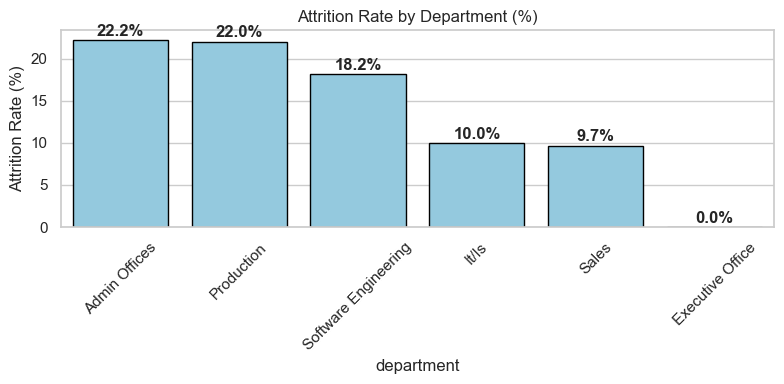

In [24]:
# Calculate attrition rate by department

attrition_dept = (
    df.groupby('department')['status']
    .apply(lambda x: (x == 'Terminated').mean() * 100)
    .sort_values(ascending=False)
)

# Show table
print("Attrition Rate by Department (%):")
print(attrition_dept.round(2))

# Plot (fixed)
plt.figure(figsize=(8,4))
sns.barplot(x=attrition_dept.index, y=attrition_dept.values, color="skyblue", edgecolor="black")
plt.title("Attrition Rate by Department (%)")
plt.xticks(rotation=45)
plt.ylabel("Attrition Rate (%)")

# Add value labels on bars
for i, v in enumerate(attrition_dept.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



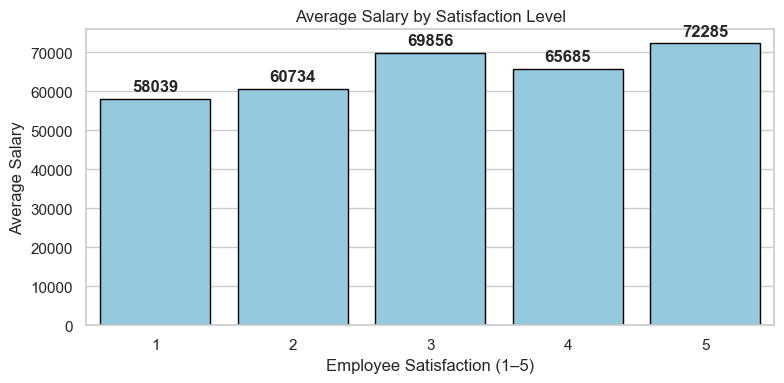

In [25]:
avg_salary_satisfaction = df.groupby('empsatisfaction')['salary'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    data=avg_salary_satisfaction,
    x='empsatisfaction',
    y='salary',
    color='skyblue',
    edgecolor='black'
)

plt.title("Average Salary by Satisfaction Level")
plt.xlabel("Employee Satisfaction (1–5)")
plt.ylabel("Average Salary")

# Add value labels
for i, val in enumerate(avg_salary_satisfaction['salary']):
    plt.text(i, val + 2000, f"{val:.0f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

#x-axis (bottom) = Employee satisfaction score
#(1 = least satisfied, 5 = highly satisfied)
#y-axis (left side)= Average salary amount


From the analysis, it is observed that employees with higher satisfaction levels (4–5) tend to have higher average salaries.This indicates that compensation is likely influencing employee satisfaction

In [27]:
avg_absences_dept = df.groupby('department')['absences'].mean().sort_values(ascending=False)


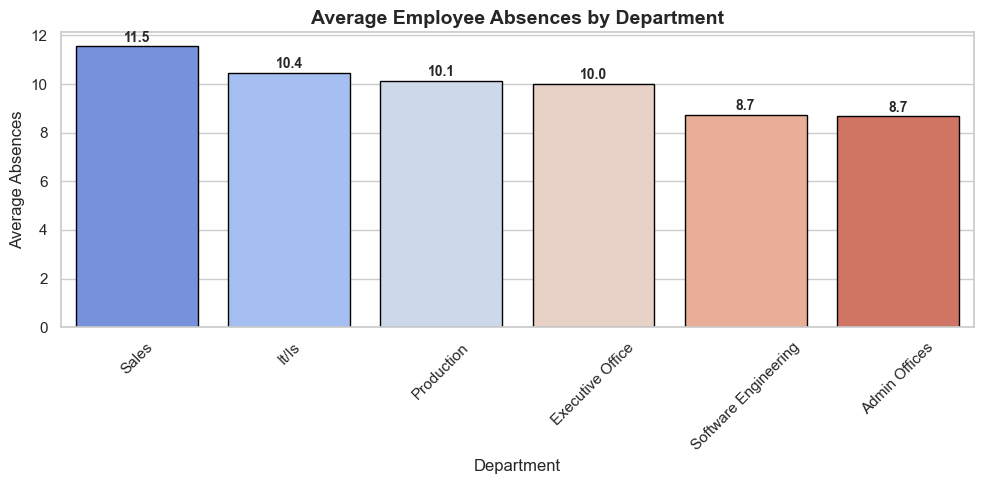

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=avg_absences_dept.index,
    y=avg_absences_dept.values,
    hue=avg_absences_dept.index,  # Added hue
    palette="coolwarm",
    legend=False,  # hides legend since hue is same as x
    edgecolor="black"
)

# Add labels
for i, value in enumerate(avg_absences_dept.values):
    plt.text(i, value + 0.2, f"{value:.1f}", ha='center', fontsize=10, fontweight='bold')

plt.title("Average Employee Absences by Department", fontsize=14, fontweight='bold')
plt.xlabel("Department")
plt.ylabel("Average Absences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the analysis, we can see that some departments, such as Production or Sales, have higher average absences compared to others.

In [29]:
df.to_csv("HRDataset_Data_Cleaning_Final.csv", index=False)
print(" Cleaned dataset saved successfully as 'HRDataset_Data_Cleaning_Final.csv'")


 Cleaned dataset saved successfully as 'HRDataset_Data_Cleaning_Final.csv'
